# Practice-----> potato disease classfication

Reference links 
1. https://github.com/codebasics/potato-disease-classification/blob/main/training/potato-disease-classification-model.ipynb

### Mounting drive for data loading

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

### Loading the dependencies

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
# from tensorflow import keras
# from tensorflow.keras import layers
print("D o n e B r o")

D o n e B r o


In [38]:
from tensorflow import keras
# from tensorflow.keras import layers

### Making constants

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

### Loading the image file in colab with tf.keras

In [5]:
data =tf.keras.preprocessing.image_dataset_from_directory(
    "D:\msc ai\Research\potato disease\PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE),)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = data.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(data)

68

In [8]:
68*32

2176

In [9]:
for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 2 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1]


In [10]:
for image_batch, labels_batch in data.take(1):
    print(image_batch[0].numpy())


[[[131. 129. 140.]
  [136. 134. 145.]
  [145. 143. 154.]
  ...
  [146. 144. 155.]
  [135. 133. 144.]
  [119. 117. 128.]]

 [[144. 142. 153.]
  [136. 134. 145.]
  [134. 132. 143.]
  ...
  [127. 125. 136.]
  [126. 124. 135.]
  [120. 118. 129.]]

 [[142. 140. 151.]
  [131. 129. 140.]
  [125. 123. 134.]
  ...
  [114. 112. 123.]
  [125. 123. 134.]
  [130. 128. 139.]]

 ...

 [[200. 203. 212.]
  [204. 207. 216.]
  [208. 211. 220.]
  ...
  [165. 167. 179.]
  [167. 169. 181.]
  [167. 169. 181.]]

 [[192. 195. 204.]
  [198. 201. 210.]
  [205. 208. 217.]
  ...
  [171. 173. 185.]
  [169. 171. 183.]
  [166. 168. 180.]]

 [[182. 185. 194.]
  [190. 193. 202.]
  [198. 201. 210.]
  ...
  [169. 171. 183.]
  [164. 166. 178.]
  [158. 160. 172.]]]


### Visualizing the classes

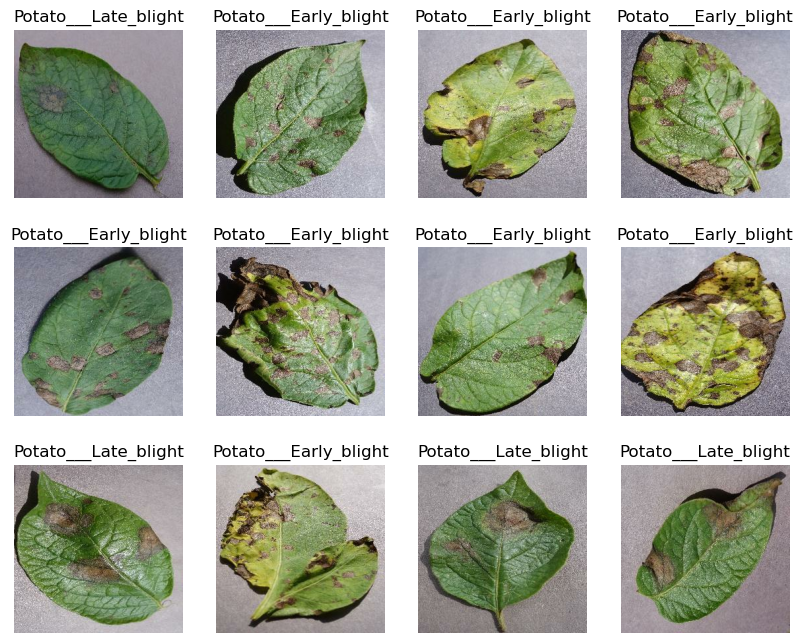

In [15]:
plt.figure(figsize=(10,8))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")
    

### Train_Test_Split

In [16]:
train_size = 0.8
len(data)*train_size

54.400000000000006

In [17]:
train_ds = data.take(54)
len(train_ds)

54

In [18]:
test_ds = data.skip(54)
len(test_ds)

14

In [19]:
val_size = 0.1
len(data)*val_size

6.800000000000001

In [20]:
#val_ds = test_ds.take(7)
#len(val_ds)

In [21]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
test_ds = test_ds.skip(6)
len(test_ds)

8

### Partitioning the data

In [23]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size = len(ds)
  
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  
  return train_ds,val_ds,test_ds

In [24]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(data)

In [25]:
len(train_ds)

54

In [26]:
len(val_ds)

6

In [27]:
len(test_ds)

8

Cache, Shuffle, and Prefetch the Dataset

In [28]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Building 

In [29]:
resize_and_rescale=tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),

])

In [30]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),

])

In [31]:
# Defining the model
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)
print('done')

done


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [33]:
from tensorflow.python.data.ops.options import OptimizationOptions
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics =['accuracy'])
print('done')

done


In [39]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [40]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
54/54 [==============================] - 107s 2s/step - loss: 0.2693 - accuracy: 0.8924 - val_loss: 0.2155 - val_accuracy: 0.9219
Epoch 2/20
54/54 [==============================] - 112s 2s/step - loss: 0.1762 - accuracy: 0.9334 - val_loss: 0.3968 - val_accuracy: 0.8698
Epoch 3/20
54/54 [==============================] - 122s 2s/step - loss: 0.1601 - accuracy: 0.9398 - val_loss: 0.2992 - val_accuracy: 0.8906
Epoch 4/20
54/54 [==============================] - 114s 2s/step - loss: 0.1929 - accuracy: 0.9219 - val_loss: 0.1634 - val_accuracy: 0.9427
Epoch 5/20
54/54 [==============================] - 112s 2s/step - loss: 0.1621 - accuracy: 0.9375 - val_loss: 0.1805 - val_accuracy: 0.9323
Epoch 6/20
54/54 [==============================] - 112s 2s/step - loss: 0.1123 - accuracy: 0.9560 - val_loss: 0.2597 - val_accuracy: 0.9062
Epoch 7/20
54/54 [==============================] - 112s 2s/step - loss: 0.1161 - accuracy: 0.9514 - val_loss: 0.1691 - val_accuracy: 0.9375
Epoch 8/20
54

In [41]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 7s 500ms/step - loss: 0.2734 - accuracy: 0.9219


In [42]:
history

In [43]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
len(history.history['loss'])

20

In [46]:
type(history.history['loss'])

list

In [47]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.2692590355873108,
 0.17623060941696167,
 0.16011837124824524,
 0.19287003576755524,
 0.16206781566143036]

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

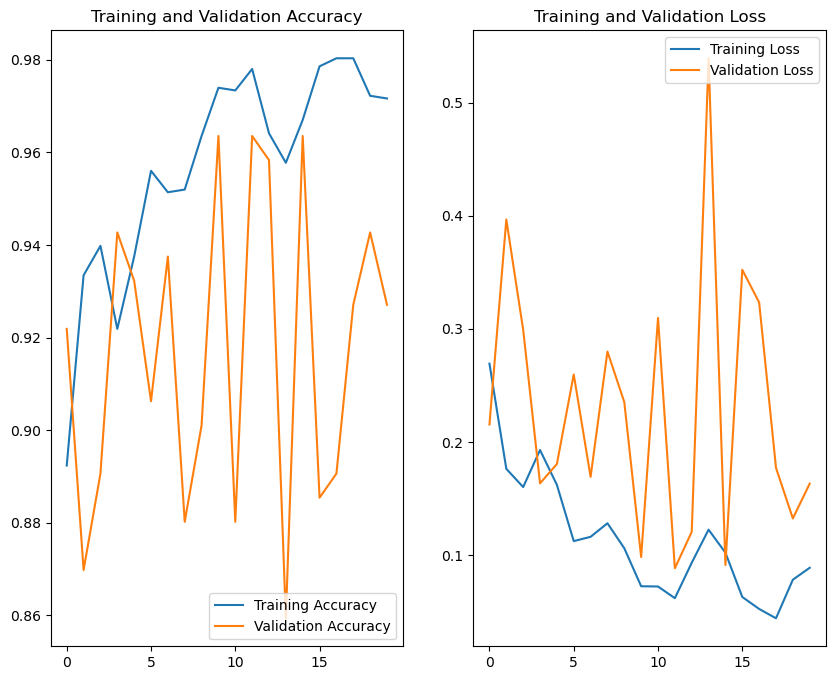

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 817ms/step
predicted label: Potato___Early_blight


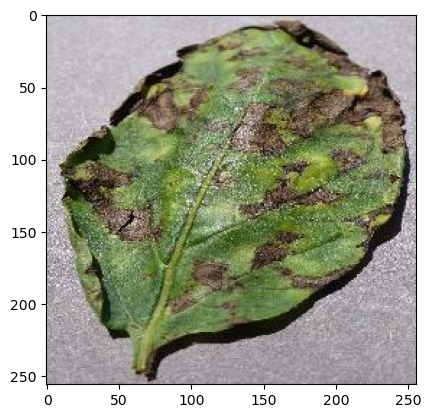

In [51]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

Write a function for inference

In [52]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 50ms/step


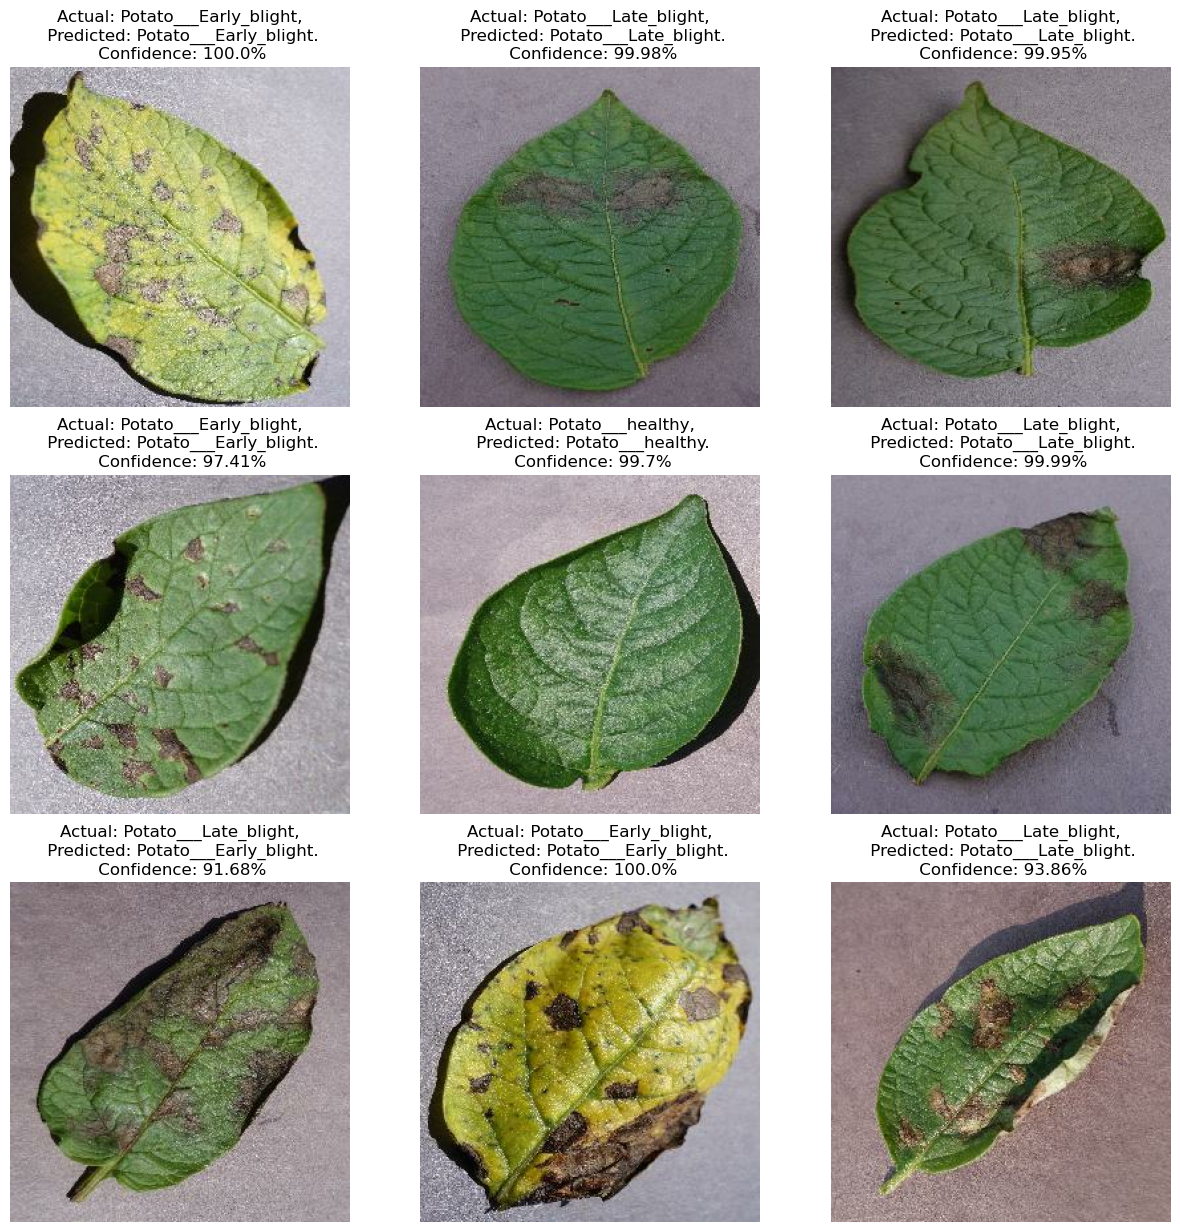

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
# model_version = 1
# model.save(f"../models/{model_version}")

In [63]:
import os
model_version =([int (i) for i in os.listdir("../models/")])
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/[1]\assets


INFO:tensorflow:Assets written to: ../models/[1]\assets
